# Titanic project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features,  need to predict if an arbitrary passenger on Titanic would survive the sinking or not. 
 
Details about dataset:

rows:891

columns:12

target:Survived


# Import liabrary

In [241]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [173]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here we have 891 rows and 12 columns

# Exploratory Data Analysis

In [174]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here we have integer,float and object type of data

In [175]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing value is presented in the column Age,Cabin,Embarked in the dataset. so better visualisation lets check heatmap

<AxesSubplot:>

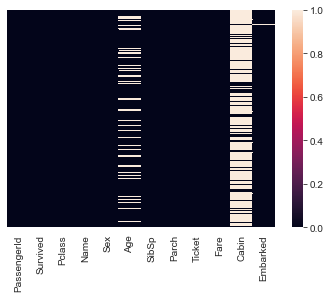

In [176]:
sns.heatmap(df.isnull(),yticklabels=False)

Most of the nan value shown in the Age and Cabin columns.Looking at the cabin column ,we are just missing too much of the data to do somthing useful with at abasic level.

<AxesSubplot:xlabel='Survived', ylabel='count'>

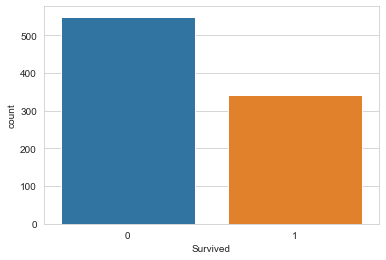

In [177]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df)

In this countplot we can understand most of the people not survived in the disaster. Below 350 people are survived.

In [178]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

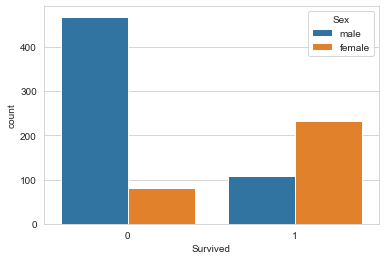

In [179]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df)

 More than 450 male are not survived and more than 200 female are survived. so we can conlude that around 75% female are survived and 75% - 80% male are not survived from the disaster.

<AxesSubplot:xlabel='Survived', ylabel='count'>

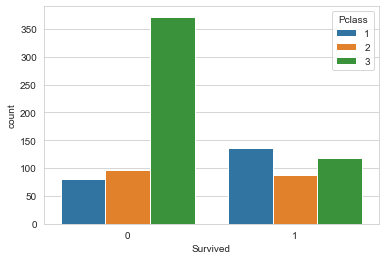

In [180]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=df)

More number of third class people are not survived and below 100 people are survived in tha first class. in the case of survived first class passenger are safe.

<AxesSubplot:xlabel='Age'>

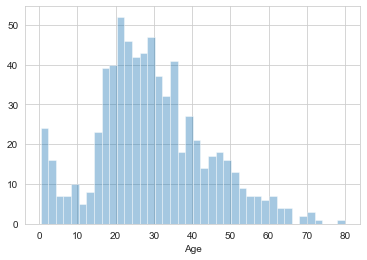

In [181]:
sns.distplot(df["Age"].dropna(),kde=False,bins=40)

Here we can see that age between 20 to 30 is the high number of passenger and very less amount of older passenger. In this just like a bell shape curve and some outlier present.

<AxesSubplot:xlabel='Age', ylabel='count'>

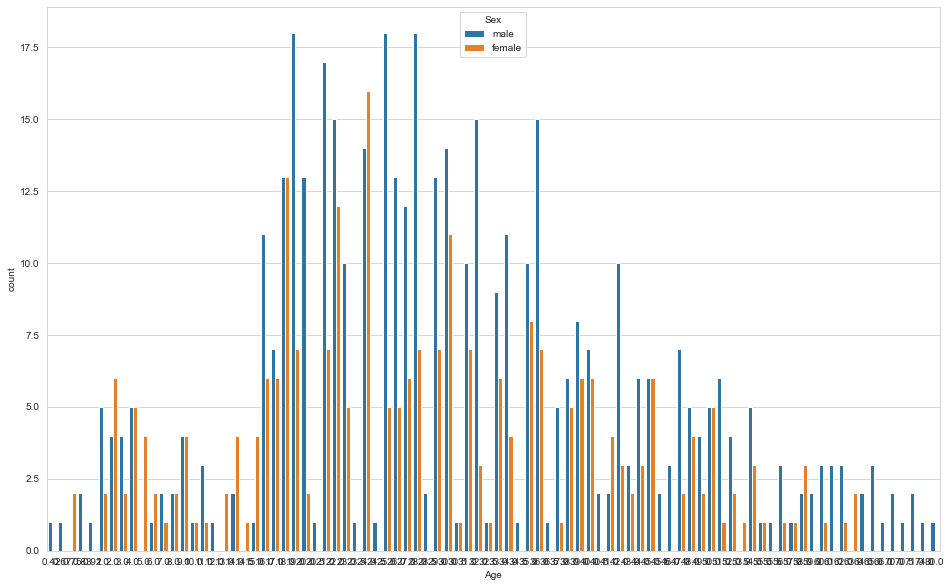

In [182]:
plt.figure(figsize =(16,10))
sns.set_style("whitegrid")
sns.countplot(x="Age",hue="Sex",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

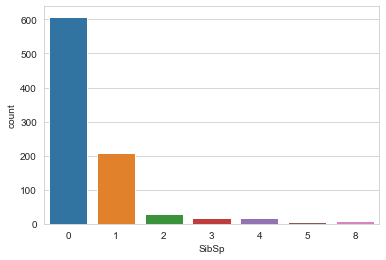

In [183]:
sns.countplot(x="SibSp",data=df)

Most of the passenger did not have sibiling and spouse 

# Data Cleaning

missing value

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

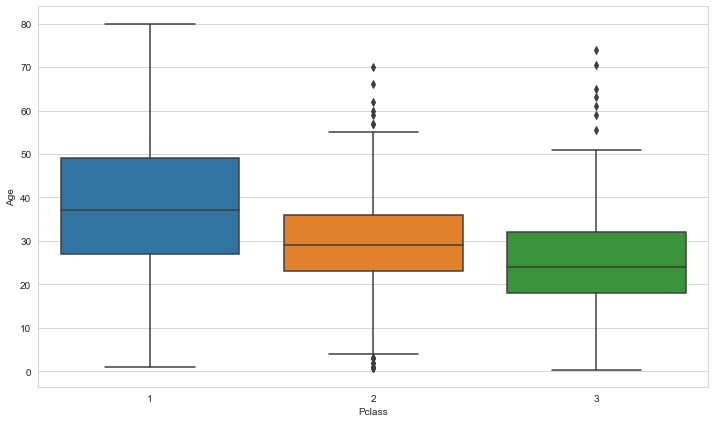

In [184]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=df)

WE can see that higher classes tend to be older. outlier also can see in the 2nd and 3rd class. We will use these average age values to impute based on Pclass for age

In [185]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37  #replacing with 37 bcs average value of the first class is around 37
        
        elif Pclass ==2:
            return 29 #average value of 2nd class is near to 29
        
        else:
            return 24 # average value of 3rd class
        
    else:
        return Age

In [186]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

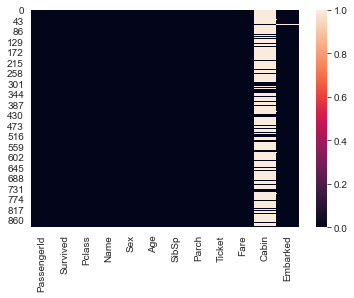

In [187]:
sns.heatmap(df.isnull())

see my Age column is replace with Pclass value.there no nan value in the age column. In cabin columns there are lots of nan value so it is better to drop the column

In [188]:
df.drop("Cabin",axis=1,inplace=True)

now I am drop the cabin column

# converting catogorical features

In [189]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
sex =pd.get_dummies(df["Sex"],drop_first=True)


now convert the embarked and sex column in to integer type

In [190]:
df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

drop the columns sex and embarked which we have converted.Name and Ticket are not requered .

In [191]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


so the next step is concate embark and sex columns

In [192]:
df = pd.concat([df,embark,sex],axis=1)

In [193]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


In [194]:
df.shape

(891, 10)

now we have 891 rows and 10 columns

# Outlier

In [195]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([  5,  13,  16,  16,  22,  25,  27,  28,  32,  44,  46,  47,  50,
        59,  68,  71,  82,  86,  88,  96, 109, 116, 116, 118, 119, 126,
       143, 156, 159, 164, 167, 171, 171, 180, 182, 186, 188, 196, 198,
       201, 208, 214, 233, 241, 245, 258, 260, 261, 264, 266, 274, 278,
       278, 280, 289, 299, 300, 301, 303, 311, 322, 324, 330, 341, 358,
       359, 360, 364, 368, 377, 380, 386, 388, 411, 412, 421, 428, 437,
       438, 438, 459, 468, 480, 493, 501, 502, 510, 517, 525, 527, 541,
       542, 552, 557, 560, 567, 573, 593, 610, 612, 613, 626, 629, 630,
       638, 653, 654, 657, 672, 678, 679, 680, 683, 686, 689, 697, 700,
       703, 716, 718, 727, 730, 736, 737, 742, 745, 749, 767, 768, 774,
       776, 778, 779, 787, 787, 790, 792, 813, 824, 825, 828, 846, 850,
       851, 858, 863, 885, 885, 890], dtype=int64), array([7, 5, 4, 7, 7, 5, 6, 7, 7, 7, 7, 7, 4, 4, 4, 4, 7, 5, 6, 3, 7, 3,
       7, 6, 4, 7, 7, 7, 4, 4, 5, 4, 7, 4, 4, 7, 7, 7, 7, 4, 7, 7, 4, 7,
       7,

In [196]:
# lets check the presence of outlier

print('shape before removing the outlier:',df.shape)

df_new=df[(zscr<3).all (axis=1)]#removing the outlier 

print("shape after removing the outlier:",df_new.shape)


shape before removing the outlier: (891, 10)
shape after removing the outlier: (749, 10)


percentage loss of data:

In [197]:
data_loss=((891-749)/891)*100
data_loss

15.937149270482603

when we remove the outlier we have loss 16% of datas

# Skewness

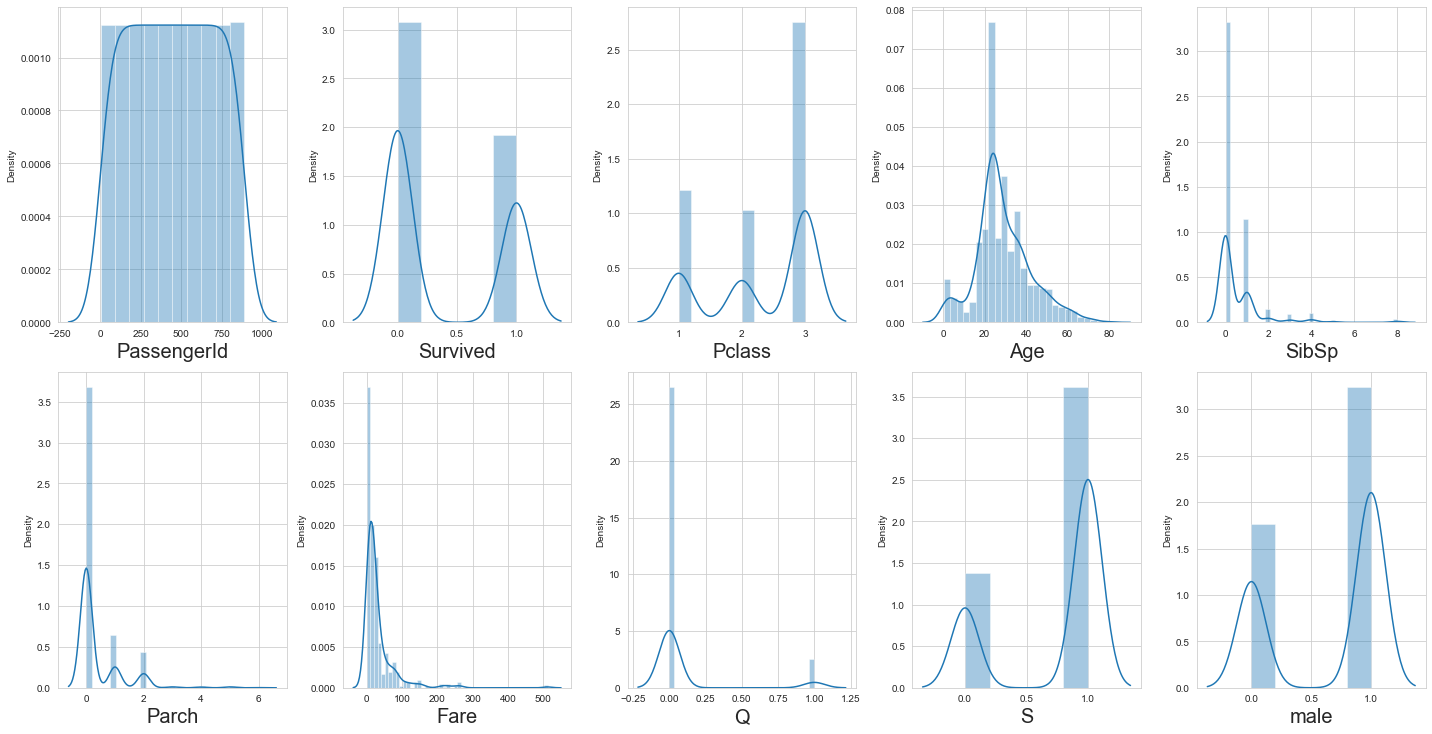

In [198]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=10:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()    


In [199]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.548256
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Q              2.948778
S             -0.997083
male          -0.618921
dtype: float64

In the above list we can see that sbisp,parch,fare columns are skewed.so need to clear with it

In [200]:
df["SibSp"]=np.cbrt(df["SibSp"])
df["SibSp"].skew()

1.0330593334477638

In [201]:
df["Parch"]=np.cbrt(df["Parch"])
df["Parch"].skew()

1.348334375571196

In [202]:
df["Fare"]=np.cbrt(df["Fare"])
df["Fare"].skew()

1.2303822111719223

Now its clear almost skewness

# split the data as input and output

In [203]:
x =df.drop(columns=["Survived"])
y = df[["Survived"]]

# scaling the x input using StandardScaler

In [204]:
scaler = StandardScaler()
x=scaler.fit_transform(x)

# finding best random state

In [205]:

maxAccu=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred=dc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

print("best accuracy is",maxAccu,"on random_state",maxRs)        

best accuracy is 0.7694915254237288 on random_state 33


best accuracy score is 76% when random_state is 33

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [229]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    f_score = f1_score(y_test,pred)
    scr = cross_val_score(model,x,y,cv=3,scoring="f1")
    print("Accuracy score is:",acc)
    print("F1 score is:",f_score)
    print(confusion_matrix(y_test,pred))
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    print("cross validation score :",scr.mean())

In [230]:
eval(LogisticRegression())

Accuracy score is: 0.8135593220338984
F1 score is: 0.751131221719457
[[157  26]
 [ 29  83]]


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       183
           1       0.76      0.74      0.75       112

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



cross validation score : 0.7193178030104653


In [231]:
eval(RandomForestClassifier())

Accuracy score is: 0.8305084745762712
F1 score is: 0.7641509433962265
[[164  19]
 [ 31  81]]


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       183
           1       0.81      0.72      0.76       112

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.82       295
weighted avg       0.83      0.83      0.83       295



cross validation score : 0.7411752087982687


In [232]:
eval(SVC())

Accuracy score is: 0.847457627118644
F1 score is: 0.7887323943661972
[[166  17]
 [ 28  84]]


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       183
           1       0.83      0.75      0.79       112

    accuracy                           0.85       295
   macro avg       0.84      0.83      0.83       295
weighted avg       0.85      0.85      0.85       295



cross validation score : 0.7295781789545547


Accuracy score of above three model is above 80% and F1 score is above 70%. There is no much differents in accuracy and cross validation so there is no under fitting and over fitting.Let's try to improve the accuracy of our best model.for that we need to calculate least different in accuracy and cross validation.

Our best model is RandomForestClassifier

# GridsearchCV 

In [233]:
parameter={"max_depth":np.arange(1,10),
           "criterion":["gini","entropy"]}

In [235]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [237]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [238]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [239]:
final_model=RandomForestClassifier(max_depth=5,criterion="entropy")
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
f_score=f1_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
print(acc)
print(f_score)
print(confusion)

0.8508474576271187
0.7884615384615384
[[169  14]
 [ 30  82]]


now the accuracy of model increase from 83 to 85

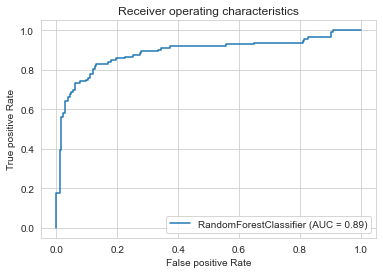

In [243]:

plot_roc_curve(final_model,x_test,y_test)
plt.title("Receiver operating characteristics")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

# AUC  is 89%